# <center><u> Credit Card Fraud Detection Project </center></u>

### Business Problem
It is vital that credit card companies are able to
identify fraudulent credit card transactions so that customers
are not charged for items that they did not purchase. Such
problems can be tackled with Data Science and its importance,
along with Machine Learning, cannot be overstated. This
project intends to illustrate the modelling of a data set using
machine learning with Credit Card Fraud Detection. 

### Notebook Description
This notebook is fully written in Python 3.0 version. For each code chunk appropriate description (**Insight**) and a concise theoretical background is provided. <br/>

### 1. Import the necessary modules

In [1]:
"""!pip install matplotlib==3.3.4
!pip install numpy==1.20.1
!pip install pandas==1.3.5
!pip install scikit_learn==0.24.1
!pip install scipy==1.6.2
!pip install seaborn==0.11.1"""

'!pip install matplotlib==3.3.4\n!pip install numpy==1.20.1\n!pip install pandas==1.3.5\n!pip install scikit_learn==0.24.1\n!pip install scipy==1.6.2\n!pip install seaborn==0.11.1'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from io import BytesIO

### 2. Loading the dataset

In [3]:
data = pd.read_csv("creditcard.csv")
pd.options.display.max_columns = None

In [4]:
data.head().append(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### Insight:
This data set includes all transactions recorded over the course of two days. The time is recorded in the number of seconds since the first transaction in the data set. The features was prepared using PCA and so the physical interpretation of individual features does not make sense. The only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
#Checking number of rows & columns
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 284807
Number of Columns: 31


In [6]:
#Exploring the columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#Get information about Dataset like total number of rows & columns, Datatypes of each columns & memory requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Get the Fraud & the Normal dataset
fraud = data.loc[data["Class"] == 1]
normal = data.loc[data["Class"] == 0]

# 3. Exploratory Data Analysis

In [9]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**The dataset is highly imbalanced**  

0 --> Normal Transaction  
1 --> Fraud Transaction  

Number of Fraud transactions: 492
Number of Genuine transactions: 284315
Percentage of Fraud transactions: 0.001727485630620034


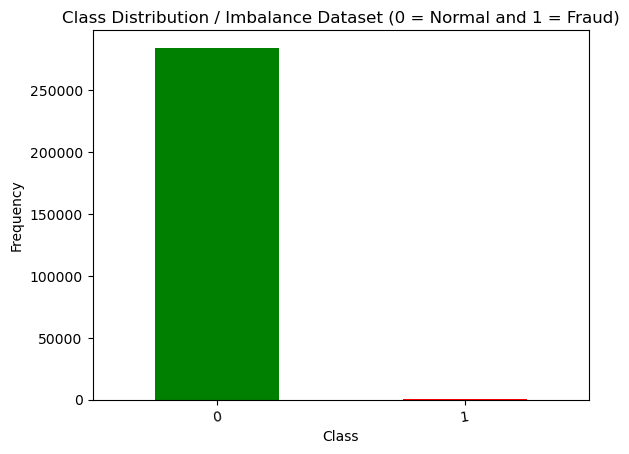

In [10]:
print("Number of Fraud transactions: " + str(len(data[data["Class"] == 1])))
print("Number of Genuine transactions: " + str(len(data[data["Class"] == 0])))
print("Percentage of Fraud transactions: " + str(len(data[data["Class"] == 1])/ data.shape[0]))

count_class = pd.value_counts(data["Class"], sort = True)
c = ["g", "r"]
count_class.plot(kind = "bar", rot = 8, color = c)

plt.title("Class Distribution / Imbalance Dataset (0 = Normal and 1 = Fraud)")

plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

#### Insight:
Clearly there is an imbalance in the data with only 0.17% of the total cases are fraudulent. For a quick curiosity let us check if there is any difference between the amount of valid transaction and fraudulent transactions.

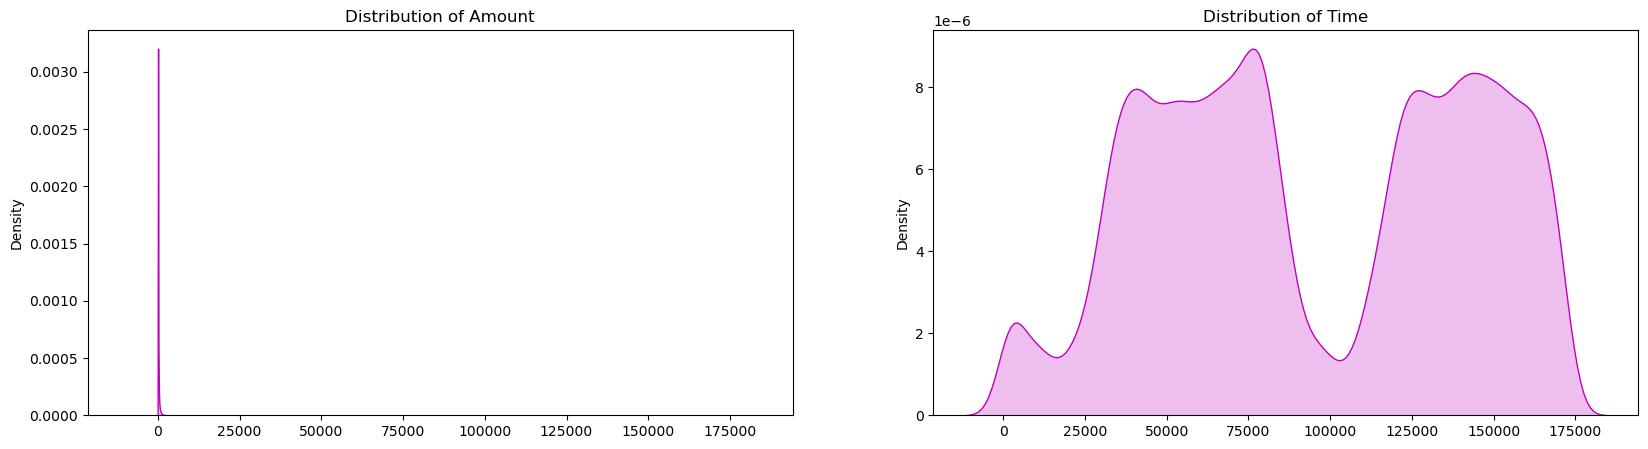

In [11]:
f, axes = plt.subplots(1, 2, figsize=(20,5), sharex = True)

amount_val = data["Amount"].values
time_val = data["Time"].values
bins = (10,20,30,40,50)

sns.distplot(amount_val, hist = False,kde = True, color = "m", kde_kws = {"shade" : True}, ax = axes[0]).set_title("Distribution of Amount")

sns.distplot(time_val, hist = False,kde = True,color = "m", kde_kws = {"shade" : True}, ax = axes[1]).set_title("Distribution of Time")

plt.show()

#### Insights:
From the distribution of the two named features in the dataset we can conclude following:   
For Time, it is clear that there were certain duration in the day when most of the transactions took place.  
The transaction Amount is showing skewed distribution as most of the observations lies in the top 10 percentile. Max value is 25,000$. The transaction time does not have high significance, as due to night time, there might be less no. of transactions.

### Summary of feature - Amount

In [24]:
print("Summary of the feature - Amount incase of Normal Transactions" + "\n--------------------------------------------------")
normal.Amount.describe()

Summary of the feature - Amount incase of Normal Transactions
--------------------------------------------------


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
print("Summary of the feature - Amount incase of Fraud Transactions" + "\n--------------------------------------------------")
fraud.Amount.describe()

Summary of the feature - Amount incase of Fraud Transactions
--------------------------------------------------


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Insight: 
As we can clearly notice from this, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with. Now let us try to understand the distribution of values in each of the features.  
We have total 492 fraud transactions. Important insight we can gather is average amount for fraudulent transaction is Dollar 122 which is more than the average amount for normal transactions that is Doller 88.   

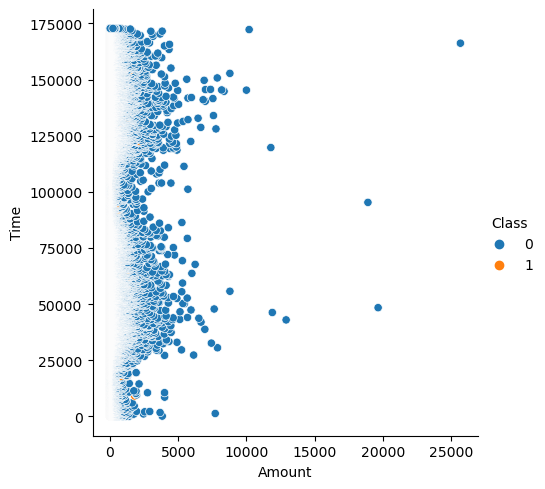

In [14]:
sns.relplot(x = "Amount", y= "Time", hue = "Class", data = data)

**The rest of the features don't have any physical interpretation and will be seen through histograms.**

### Plotting the distribution of all features

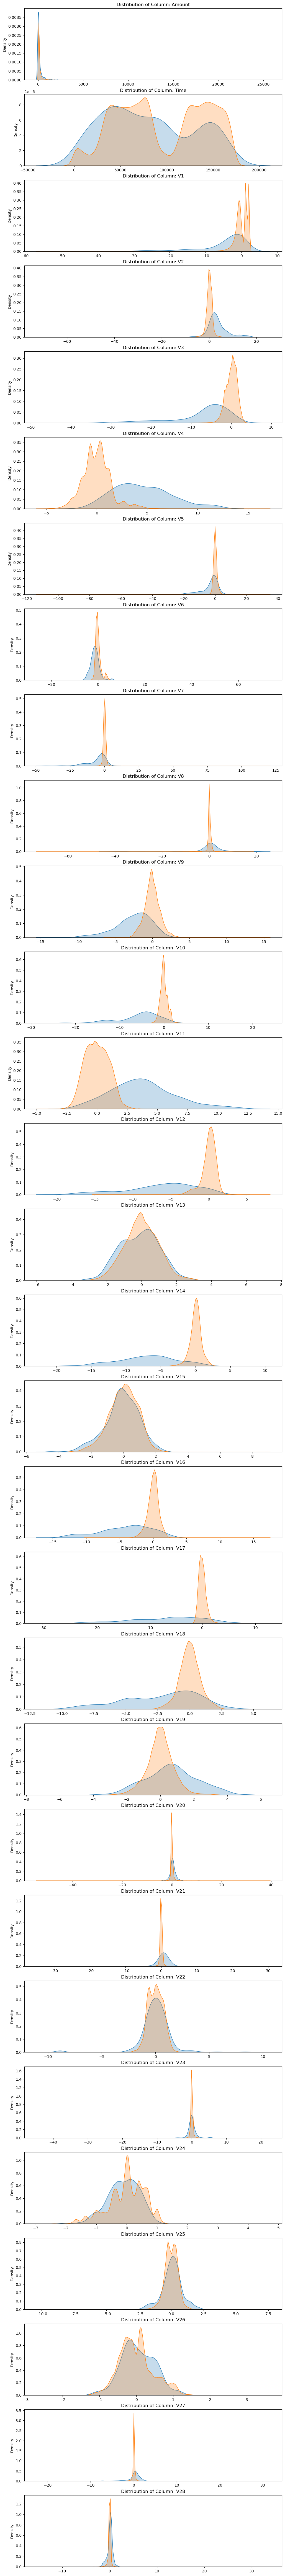

In [15]:
# Reorder the columns Amount, Time then the rest
data_plot = data.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()


## Correlation Matrix
_Getting correlation of each features in dataset._

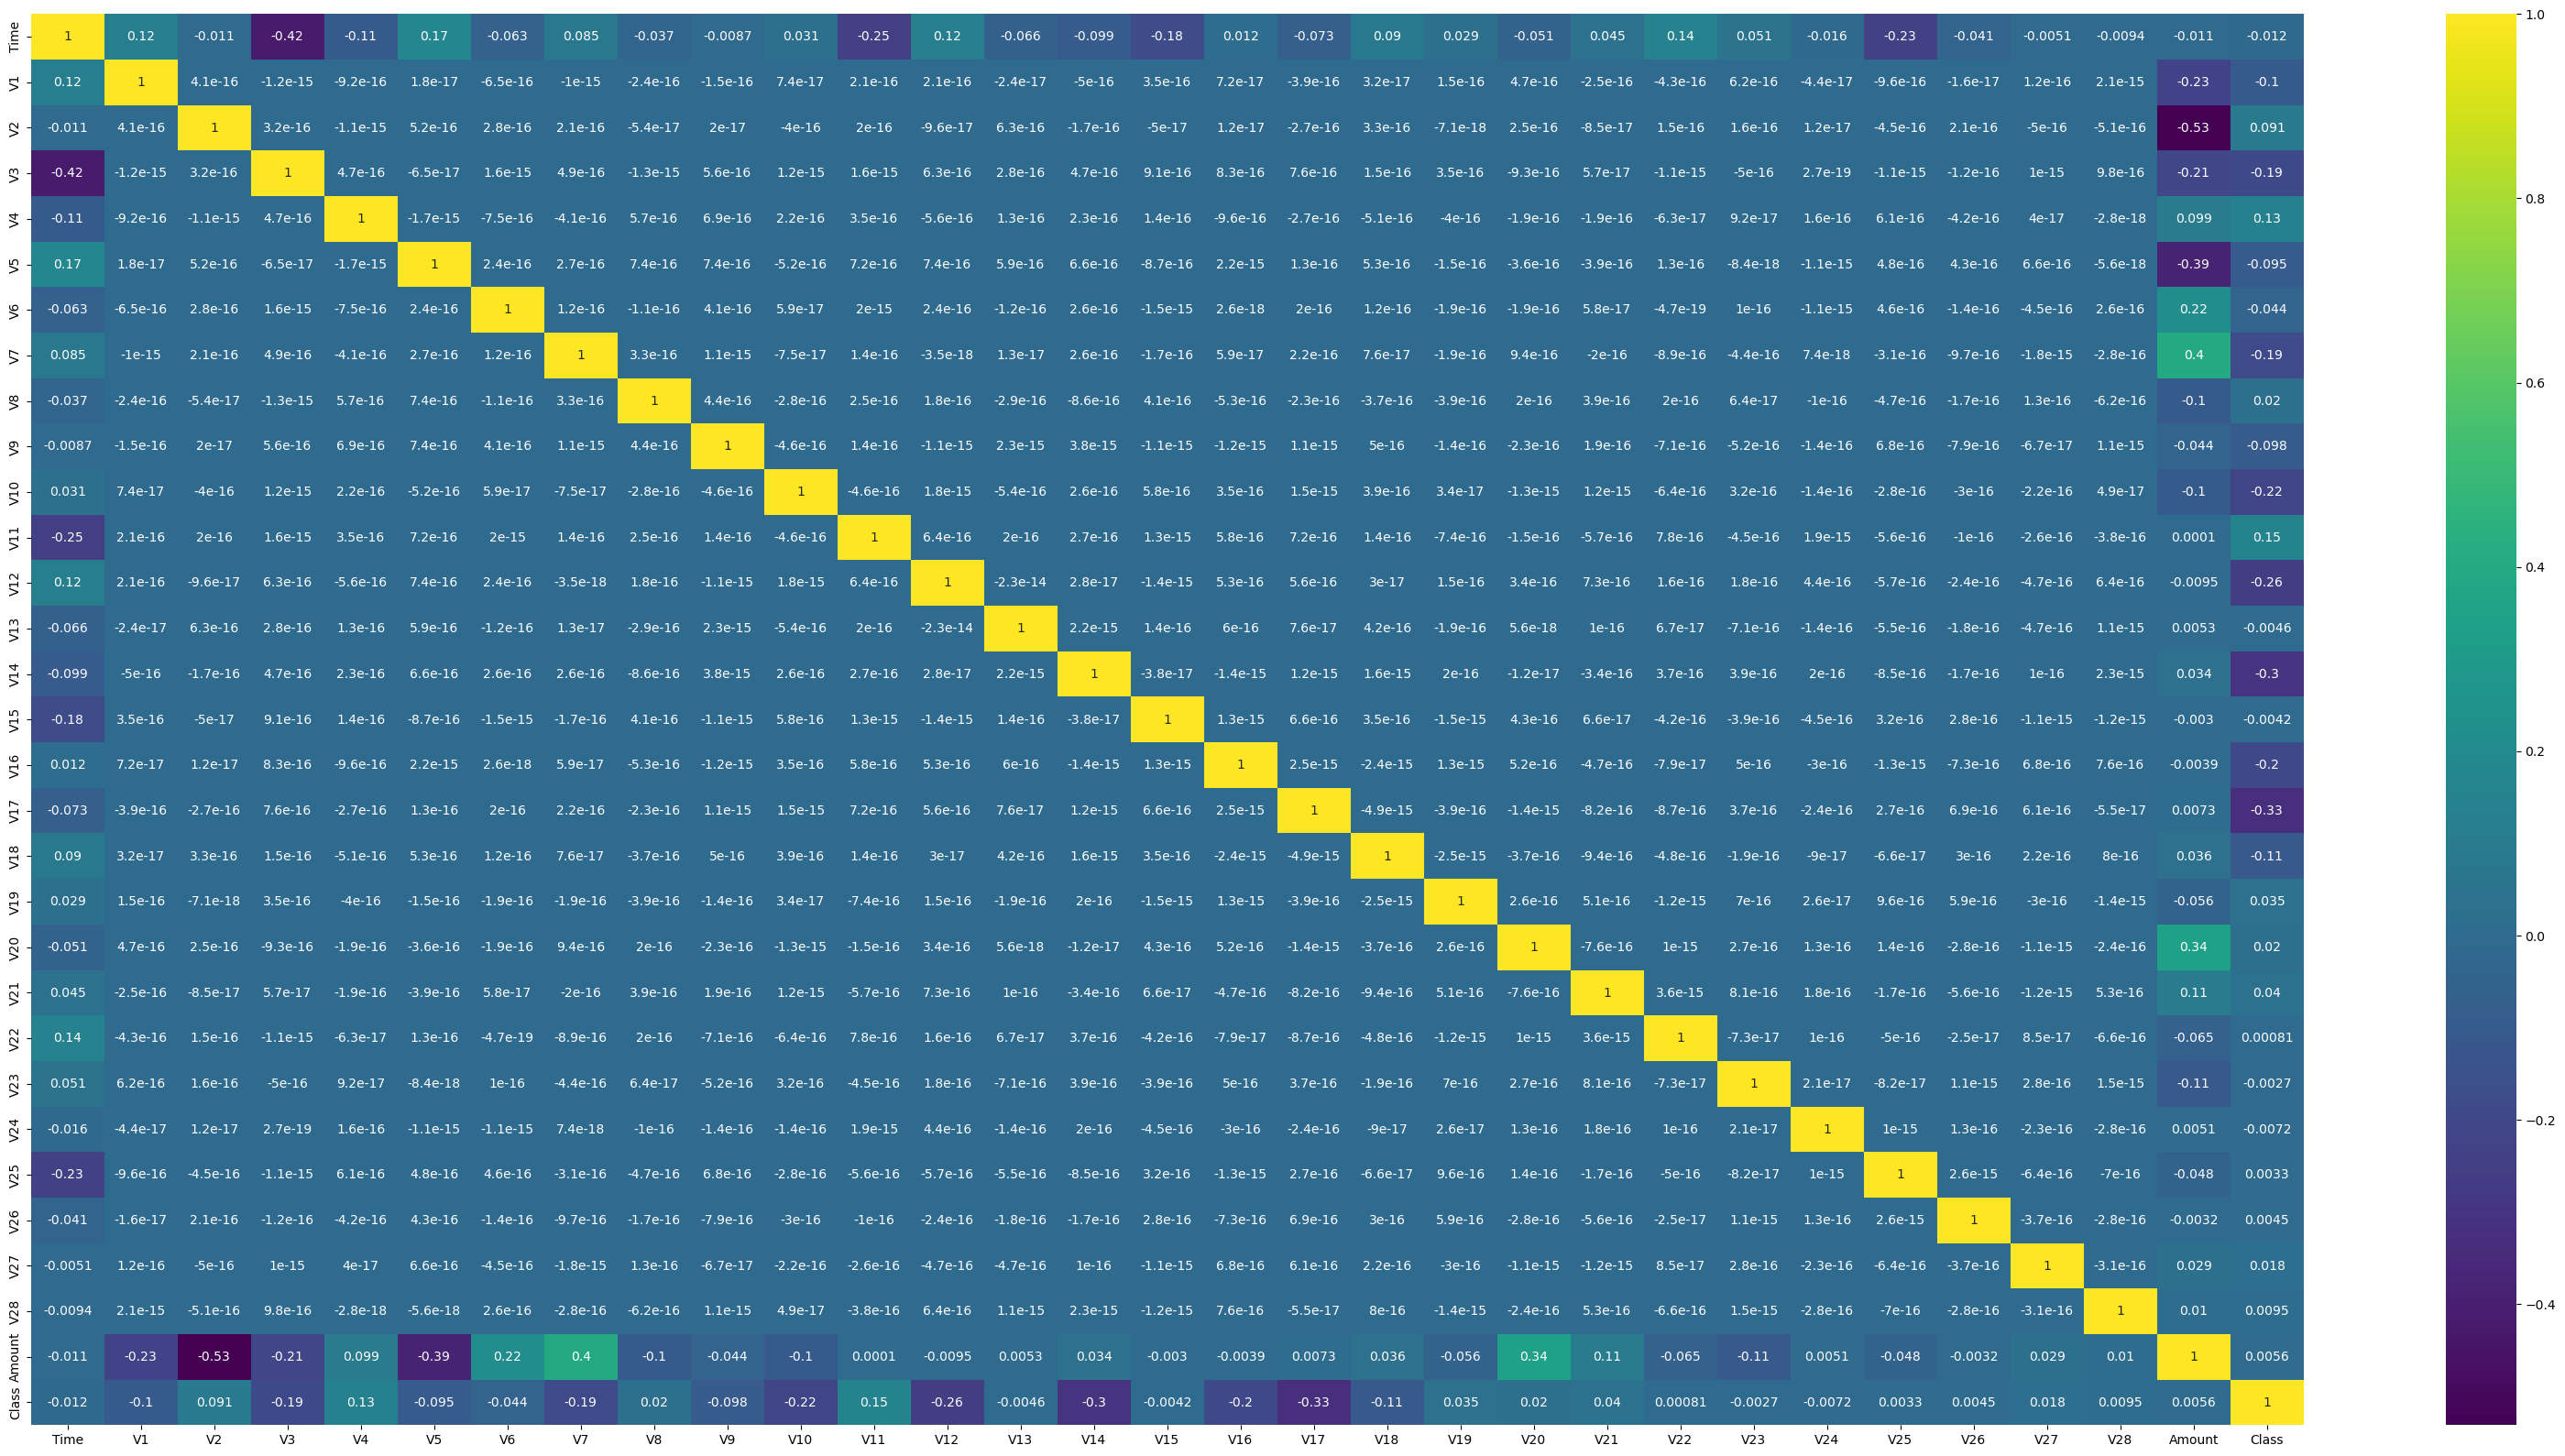

In [16]:
corr = data.corr()
top_corr_features = corr.index
plt.figure(figsize=(40,20))
#Pltting heatmap
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "viridis")

# 

# 4. Data Preparation

This part will include following steps:    
1) Indentify Null Values  
2) Scaling  
3) Outlier Detection Removal 

In [12]:
#Checking for null values if any
data.isnull().sum().any()

False

#### Insight:
As there are no missing values in dataset, we turn to standardisation. We standardize only Time & Amount using RobustScaler.

In [13]:
#Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(data[["Time", "Amount"]])
data[["Time", "Amount"]] = scaler.transform(data[["Time", "Amount"]])

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [14]:
#Outlier Detection

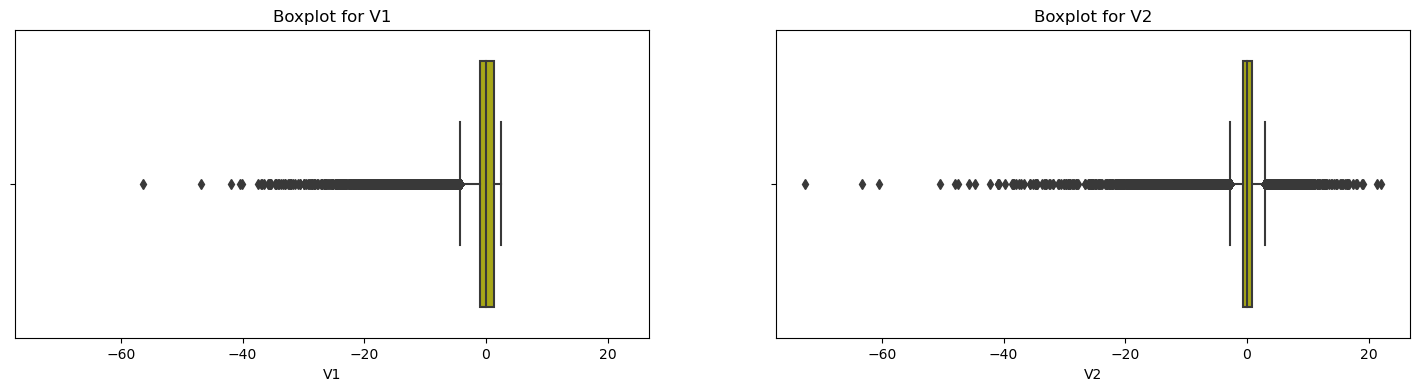

In [15]:
# Boxplot for two example variables in dataset

f,axes = plt.subplots(1, 2, figsize = (18,4), sharex = True)

variable1 = data["V1"]
variable2 = data["V2"]

sns.boxplot(variable1, color = "y", ax = axes[0]).set_title("Boxplot for V1")

sns.boxplot(variable2, color = "y", ax = axes[1]).set_title("Boxplot for V2")

plt.show()


#### Insight:
From above visualisation of outliers & distribution of both variables, we can think of identifying observations that are extreme on either sides of the box as outliers. Further we try to calculate the IQR of all the fearures.

In [16]:
#Finding the IQR of all the features

quartile_1 = data.quantile(0.25)
quartile_3 = data.quantile(0.75)

IQR = quartile_3 - quartile_1
print(IQR)

Time      1.000000
V1        2.236015
V2        1.402274
V3        1.917560
V4        1.591981
V5        1.303524
V6        1.166861
V7        1.124512
V8        0.535976
V9        1.240237
V10       0.989349
V11       1.502088
V12       1.023810
V13       1.311044
V14       0.918724
V15       1.231705
V16       0.991333
V17       0.883423
V18       0.999657
V19       0.915248
V20       0.344762
V21       0.414772
V22       1.070904
V23       0.309488
V24       0.794113
V25       0.667861
V26       0.567936
V27       0.161885
V28       0.131240
Amount    1.000000
Class     0.000000
dtype: float64


In [17]:
# After calculating the IQR for each variable, we will remove all the observations which have outlier values.

constant = 3
data_valid = data[~((data < (quartile_1 - constant * IQR)) | (data > (quartile_3 + constant * IQR))).any(axis=1)]

deleted_rows = data.shape[0] - data_valid.shape[0]

print(deleted_rows)


53376


#### Insight:
We have removed 53376 rows from dataset as Outliers.

# 5. Model Building

**First step in modelling is dividing the data into response and features. And then also make train-test split of the data for further modelling and validation.**

In [18]:
from sklearn.model_selection  import train_test_split

In [19]:
#Separating response and features in x and y variable.
y = data["Class"]
x = data.iloc[:,0:30]

In [20]:
#Using Sklearn to split our data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Since the data is higly imbalanced, we will run one model (Random Forest) on the imbalanced data and see the performance.**

### 5.1 Random Forest Classifier

In [21]:
# Using SKLEARN module for random forest
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Fit and predict
naive_rfc = RandomForestClassifier()
naive_rfc.fit(x_train, y_train)
naive_test_preds = naive_rfc.predict(x_test)

### Performance Metrics

In [23]:
# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is :", accuracy_score(y_test, naive_test_preds))
print("The Precision is :", precision_score(y_test,naive_test_preds))
print("The recall is :", recall_score(y_test, naive_test_preds))

The accuracy is : 0.9996137776061234
The Precision is : 0.9871794871794872
The recall is : 0.7857142857142857


In [24]:
print("The accuracy is {}".format(f1_score(y_test, naive_test_preds) )) 

The accuracy is 0.8750000000000001


#### Insight:
One thing to notice here is, we had only 0.17% cases with fraud transactions and a model predicting all trasactions to be valid would have similar accuracy. So we need to train our model in a way that is not overfitted to either of the classes. for this, we introduce Oversampling and Undersampling methods. 
Oversampling resamples from the minority class to balance the class proportions. And undersampling merges or removes similar observations from the majority to achive the same.

## 6. Undersampling

In this section we first describe the structure of the modelling and validations. One trivial point to note is, we will not undersample the test data as we want our model to perform well with skewed class distributions eventually.
The steps are as follows (The whole set-up will be structured using the imbalance-learn module): 
* Use a 5-fold cross validation on the training set
* On each of the folds use undersampling 
* Fit the model on the training folds and validate on the validation fold

### Importing all the libraries and module before starting with the classifiers.

In [25]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

In [26]:
# Import the imbalance Learn module
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 6.1) Logistic Regression for Undersampling 

In [27]:
# Logistic Regression 
imba_pipeline = make_pipeline(NearMiss(), 
                              LogisticRegression())

log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']}

new_params = {'logisticregression__' + key: log_reg_params[key] for key in log_reg_params}
#grid_imba_log_reg = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)


grid_imba_log_reg = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                                  return_train_score=True)

grid_imba_log_reg.fit(x_train, y_train);
#logistic_cv_score_us = cross_val_score(grid_imba_log_reg, x_train, y_train, scoring = 'recall', cv = kf)
logistic_cv_score_us = cross_val_score(grid_imba_log_reg, x_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(x_test)
logistic_recall_us = recall_score(y_test, y_test_predict)
logistic_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Logistic Regression: " + str(ulogistic_cv_score.mean()))
# print("Recall Score for Logistic Regression: " + str(ulogistic_recall))
log_reg_us = grid_imba_log_reg.best_estimator_

In [28]:
log_reg_us, logistic_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))]),
 array([0.98717949, 0.94936709, 0.88607595, 0.87341772, 0.87341772]))

In [29]:
log_reg_us, logistic_cv_score_us, logistic_recall_us, logistic_accuracy_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))]),
 array([0.98717949, 0.94936709, 0.88607595, 0.87341772, 0.87341772]),
 0.9183673469387755,
 0.812366138829395)

In [30]:
f1_score_log = f1_score(y_test, y_test_predict)

recall_log = recall_score(y_test, y_test_predict)

precision_log = precision_score(y_test, y_test_predict)

print(f1_score_log, recall_log, precision_log)

0.016562384983437616 0.9183673469387755 0.008356545961002786


In [31]:
f1_score_log = f1_score(y_test, y_test_predict, average = 'weighted')

recall_log = recall_score(y_test, y_test_predict) 

precision_log = precision_score(y_test, y_test_predict)

print(f1_score_log, recall_log, precision_log)

0.8947758739350081 0.9183673469387755 0.008356545961002786


In [38]:
# Cumulatively create a table for the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
yproba = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict_proba(x_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Logistic Regression",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
print(result_table)

           classifiers                                                fpr  \
0  Logistic Regression  [0.0, 7.034327518289252e-05, 0.000140686550365...   

                                                 tpr       auc  
0  [0.0, 0.0, 0.0, 0.0, 0.01020408163265306, 0.01...  0.947852  


## 6.2) Random Forest for Undersampling

In [48]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              RandomForestClassifier())
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
#grid_imba_rf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_rf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                        return_train_score=True)

grid_imba_rf.fit(x_train, y_train);

rfc_cv_score_us = cross_val_score(grid_imba_rf, x_train, y_train, scoring='recall', cv=kf)

y_test_predict = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict(x_test)
rfc_recall_us = recall_score(y_test, y_test_predict)
rfc_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Random Forest: " + str(urfc_cv_score.mean()))
# print("Recall Score for Random Forest: " + str(urfc_recall))
rfc = grid_imba_rf.best_estimator_

In [49]:
rfc,rfc_recall_us, rfc_accuracy_us, rfc_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_depth=4, n_estimators=50,
                                         random_state=13))]),
 0.9591836734693877,
 0.5053720023875566,
 array([1.        , 0.96202532, 0.89873418, 0.93670886, 0.89873418]))

In [50]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict_proba(x_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Random Forest",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

## 6.3) Support Vector Machine for Undersampling

In [32]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              SVC(probability = True))
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

new_params = {'svc__' + key: svc_params[key] for key in svc_params}
#grid_imba_svc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_svc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                        return_train_score=True)

grid_imba_svc.fit(x_train, y_train);

svc_cv_score_us = cross_val_score(grid_imba_svc, x_train, y_train, scoring='recall', cv=kf) 

y_test_predict = grid_imba_svc.best_estimator_.named_steps['svc'].predict(x_test)
svc_recall_us = recall_score(y_test, y_test_predict)
svc_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Support Vector Classifier: " + str(usvc_cv_score.mean()))
# print("Recall Score for Support Vector Classifier: " + str(usvc_recall))
svc = grid_imba_svc.best_estimator_

In [33]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
svc, svc_recall_us, svc_accuracy_us, svc_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('svc', SVC(C=0.5, kernel='poly', probability=True))]),
 0.6632653061224489,
 0.991906885291949,
 array([0.74358974, 0.5443038 , 0.62025316, 0.69620253, 0.64556962]))

In [35]:
f1_score_svc = f1_score(y_test, y_test_predict)

recall_svc = recall_score(y_test, y_test_predict)

precision_svc = precision_score(y_test, y_test_predict)

print(f1_score_svc, recall_svc, precision_svc)

0.21996615905245345 0.6632653061224489 0.13184584178498987


In [36]:
conf = confusion_matrix(y_test, y_test_predict)
conf 

array([[56436,   428],
       [   33,    65]], dtype=int64)

In [39]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_svc.best_estimator_.named_steps['svc'].predict_proba(x_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Support Vector Classifier",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
print(result_table)

                 classifiers  \
0        Logistic Regression   
1  Support Vector Classifier   

                                                 fpr  \
0  [0.0, 7.034327518289252e-05, 0.000140686550365...   
1  [0.0, 0.0010375633089476646, 0.001090320765334...   

                                                 tpr       auc  
0  [0.0, 0.0, 0.0, 0.0, 0.01020408163265306, 0.01...  0.947852  
1  [0.0, 0.23469387755102042, 0.23469387755102042...  0.978702  


## 6.4) Decision Tree Classifier for UnderSampling

In [40]:
# DecisionTree Classifier
imba_pipeline = make_pipeline(NearMiss(), 
                              DecisionTreeClassifier())

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
new_params = {'decisiontreeclassifier__' + key: tree_params[key] for key in tree_params}
#grid_imba_tree = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_tree = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                        return_train_score=True)


grid_imba_tree.fit(x_train, y_train);
dtree_cv_score_us = cross_val_score(grid_imba_tree, x_train, y_train, scoring='recall', cv=kf)


y_test_predict = grid_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict(x_test)
dtree_recall_us = recall_score(y_test, y_test_predict)
dtree_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Decision Tree Classifier: " + str(udtree_cv_score.mean()))
# print("Recall Score for Decision Tree Classifier: " + str(udtree_recall))
tree_clf = grid_imba_tree.best_estimator_

In [41]:
tree_clf, dtree_accuracy_us, dtree_recall_us, dtree_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=2, min_samples_leaf=6))]),
 0.6532249569888697,
 0.8979591836734694,
 array([0.97435897, 0.97468354, 0.87341772, 0.87341772, 0.83544304]))

In [42]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict_proba(x_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Decision Tree",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

## 6.5) k-Nearest Neighbour Classifier for Undersampling

In [44]:
# KNeighbors Classifier
imba_pipeline = make_pipeline(NearMiss(), 
                              KNeighborsClassifier())

knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

new_params = {'kneighborsclassifier__' + key: knears_params[key] for key in knears_params}
#grid_imba_knn = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_knn = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                        return_train_score=True)

grid_imba_knn.fit(x_train, y_train);
knear_cv_score_us = cross_val_score(grid_imba_knn, x_train, y_train, scoring='recall', cv=kf)


y_test_predict = grid_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict(x_test)
knear_recall_us = recall_score(y_test, y_test_predict)
knear_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for k-Nearest Neighbour Classifier: " + str(uknear_cv_score.mean()))
# print("Recall Score for k-Nearest Neighbour Classifier: " + str(uknear_recall))
knears_neighbors = grid_imba_knn.best_estimator_

In [45]:
knears_neighbors, knear_accuracy_us, knear_recall_us, knear_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))]),
 0.8691408307292581,
 0.9081632653061225,
 array([0.92307692, 0.94936709, 0.89873418, 0.88607595, 0.86075949]))

In [46]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict_proba(x_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "k-Nearest Neighbour",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

## Summarize the undersampling model performances

In [51]:
# Gather the scores
data_score = [['Logistic Regression', logistic_cv_score_us.mean(), logistic_accuracy_us, logistic_recall_us], 
        ['Random Forest', rfc_cv_score_us.mean(), rfc_accuracy_us, rfc_recall_us], 
        ['Support Vector', svc_cv_score_us.mean(), svc_accuracy_us, svc_recall_us],
        ['Decision Tree', dtree_cv_score_us.mean(), dtree_accuracy_us, dtree_recall_us],
        ['k-Nearest Neighbour', knear_cv_score_us.mean(), knear_accuracy_us, knear_recall_us]
             ] 
  
# Create the dataframe 
data_table = pd.DataFrame(data_score, columns = ['Classifier', 'CV Score', 'Accuracy', 'Recall Score']) 
data_table

,Classifier,CV Score,Accuracy,Recall Score
0,Logistic Regression,0.913892,0.812366,0.918367
1,Random Forest,0.939241,0.505372,0.959184
2,Support Vector,0.649984,0.991907,0.663265
3,Decision Tree,0.906264,0.653225,0.897959
4,k-Nearest Neighbour,0.903603,0.869141,0.908163


#### Now we plot the ROC curve for the above classifiers.

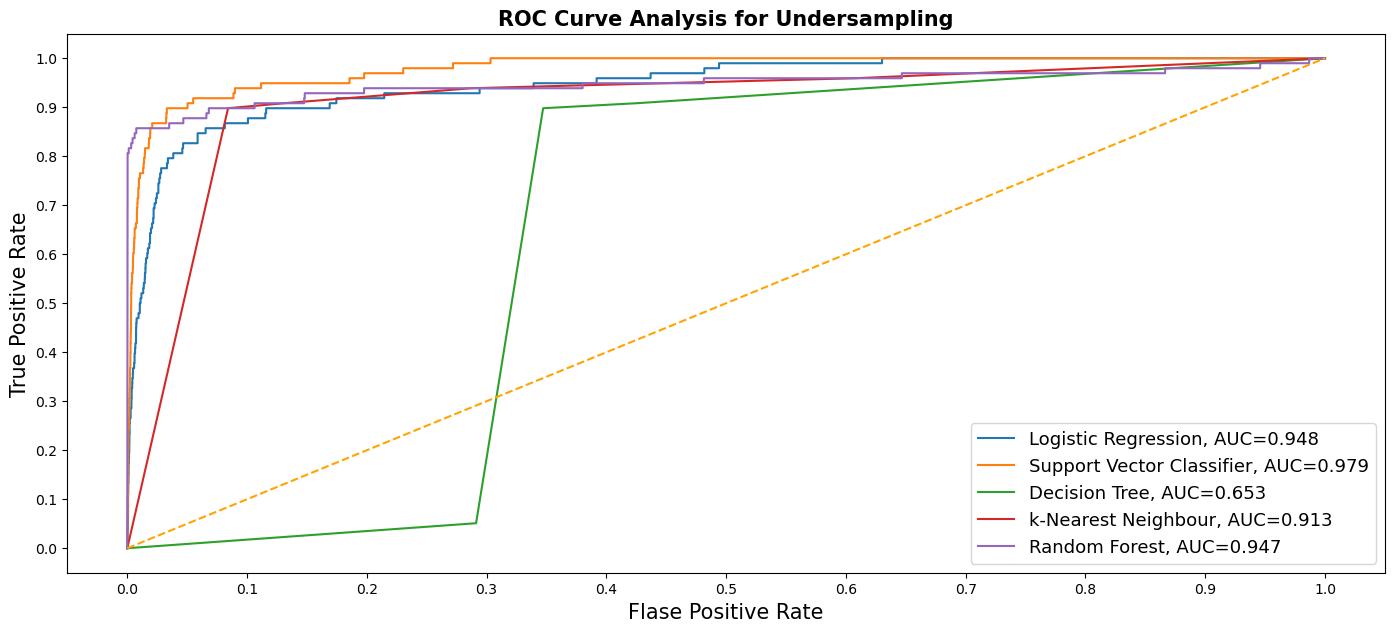

In [52]:
# Plot the ROC curve for undersampling
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### The Learning Curve
Here we choose 4 models and try to see the trend of training and cross-validation scores over varrying training size. A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

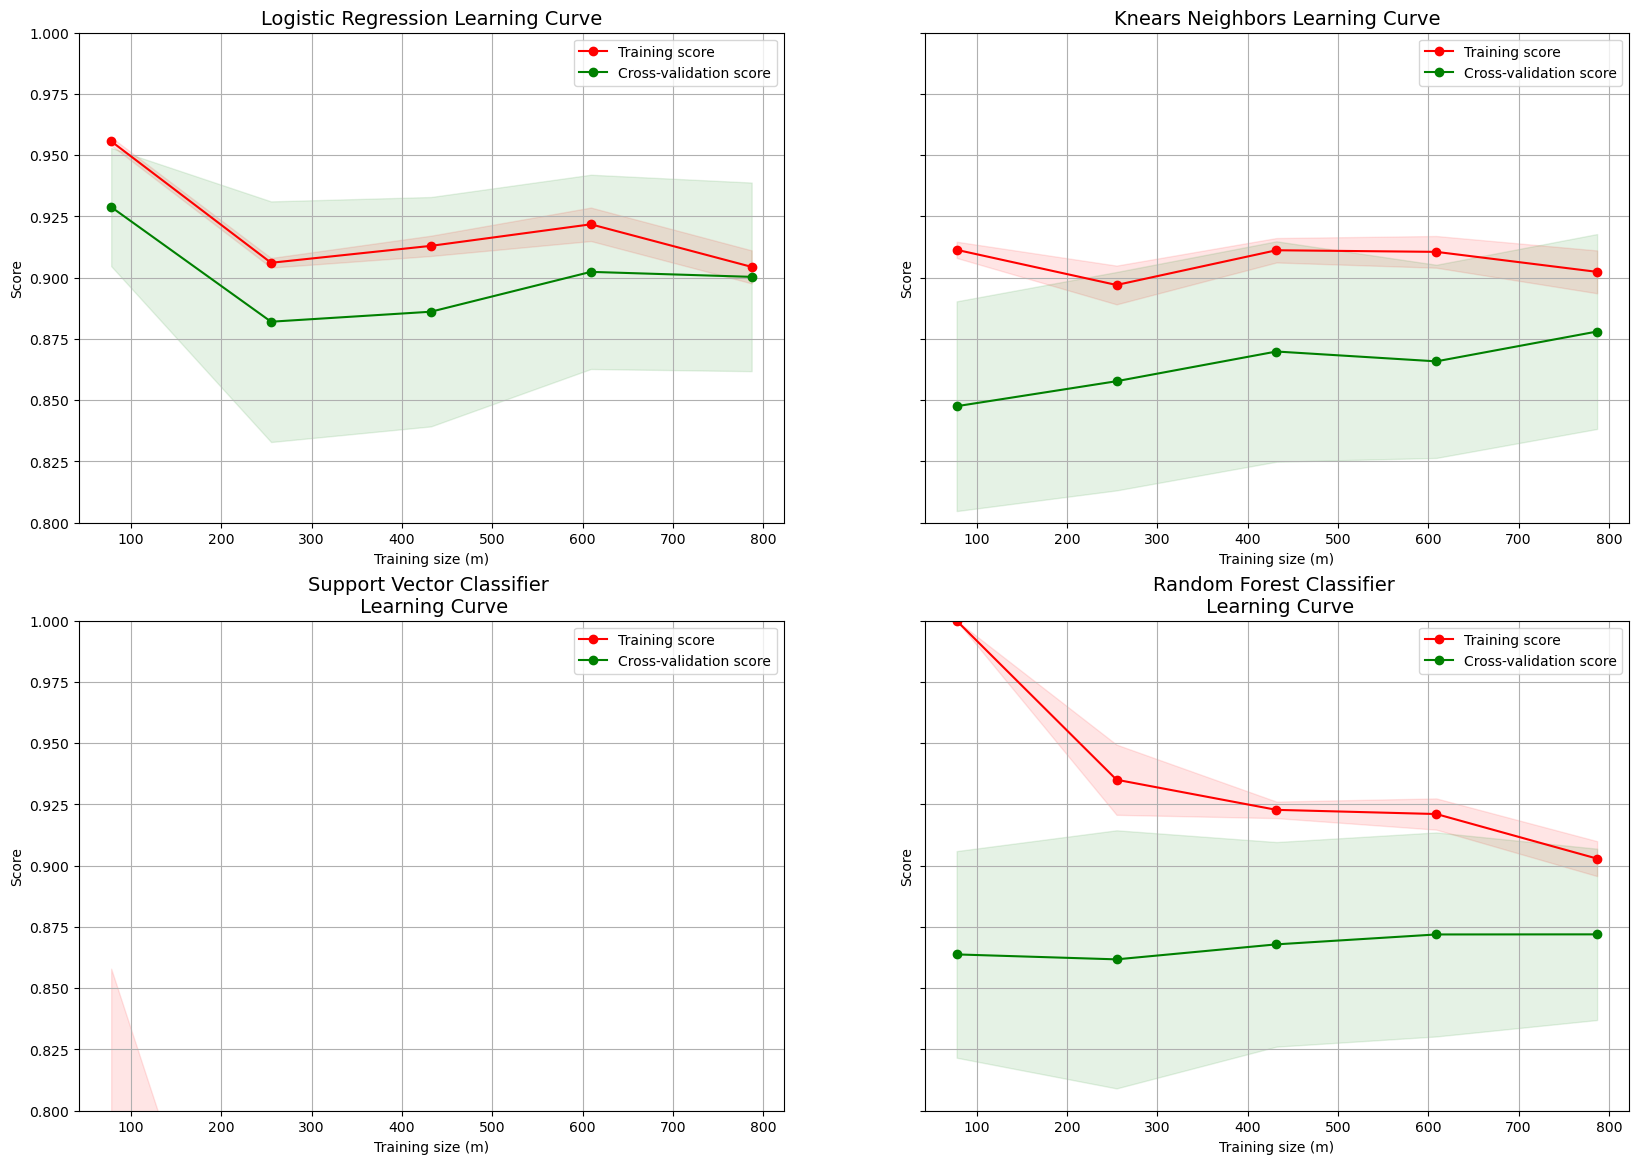

In [53]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax4.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)



df = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
y = new_df["Class"]
X = new_df.iloc[:,0:30]

plot_learning_curve(log_reg_us, knears_neighbors, svc, rfc, X, y, (0.8, 1));

## 7. Oversampling

In this section we first describe the structure of the modelling and validations. One trivial point to note is, we will not oversample the test data as we want our model to perform well with skewed class distributions eventually. The steps are as follows (The whole set-up will be structured using the imbalance-learn module):

Use a 5-fold cross validation on the training set
On each of the folds use oversampling
Fit the model on the training folds and validate on the validation fold
Note that we will use the best model parameters as obtained from grid-search algorithm in Undersampling.

In [54]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression())
#cross_val_score(imba_pipeline, x_train, y_train, scoring='recall', cv=kf)

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100], 
                 'solver' : ['liblinear']}

new_params = {'logisticregression__' + key: log_reg_params[key] for key in log_reg_params}
ran_imba_log_reg = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_log_reg.fit(x_train, y_train);

logistic_cv_score_os = cross_val_score(ran_imba_log_reg, x_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(x_test)
logistic_recall_os = recall_score(y_test, y_test_predict)
logistic_accuracy_os = accuracy_score(y_test, y_test_predict)

log_reg_os = ran_imba_log_reg.best_estimator_

In [55]:
ran_imba_log_reg.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [ ]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
ran_imba_rf = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_rf.fit(x_train, y_train);

rf_cv_score_os = cross_val_score(ran_imba_rf, x_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict(x_test)
rfc_recall_os = recall_score(y_test, y_test_predict)

rfc_os = ran_imba_rf.best_estimator_

In [ ]:
rfc_os

In [ ]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              SVC())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

new_params = {'svc__' + key: svc_params[key] for key in svc_params}
ran_imba_svc = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_svc.fit(x_train, y_train);

svc_cv_score_os = cross_val_score(ran_imba_svc, x_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_svc.best_estimator_.named_steps['svc'].predict(x_test)
svc_recall_os = recall_score(y_test, y_test_predict)

svc_os = ran_imba_svc.best_estimator_

In [ ]:
svc_os

In [ ]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              DecisionTreeClassifier())
#cross_val_score(imba_pipeline, x_train, y_train, scoring='recall', cv=kf)

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
new_params = {'decisiontreeclassifier__' + key: tree_params[key] for key in tree_params}
ran_imba_tree = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_tree.fit(x_train, y_train);

dtree_cv_score_os = cross_val_score(ran_imba_tree, x_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict(x_test)
dtree_recall_os = recall_score(y_test, y_test_predict)

tree_os = ran_imba_tree.best_estimator_

In [ ]:
tree_os

In [ ]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier())
#cross_val_score(imba_pipeline, x_train, y_train, scoring='recall', cv=kf)

knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

new_params = {'kneighborsclassifier__' + key: knears_params[key] for key in knears_params}
ran_imba_knn = RandomizedSearchCV(imba_pipeline, param_distributions=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
ran_imba_knn.fit(x_train, y_train);

knear_cv_score_os = cross_val_score(ran_imba_knn, x_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = ran_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict(x_test)
knear_recall_os = recall_score(y_test, y_test_predict)

knears_neighbors_os = ran_imba_knn.best_estimator_

In [ ]:
knears_neighbors_os

## 8. Now we summarize all the recall scores in a table for comparison.

In [ ]:
# Gather the scores
final_scores = [['Logistic Regression', logistic_accuracy_us, logistic_accuracy_os, logistic_recall_us, logistic_recall_os], 
        ['Random Forest', rfc_accuracy_us, rfc_accuracy_os, rfc_recall_us, rfc_recall_os], 
        ['Support Vector', svc_accuracy_us, svc_accuracy_os, svc_recall_us, svc_recall_os],
        ['Decision Tree', dtree_accuracy_us, dtree_accuracy_os, dtree_recall_us, dtree_recall_os],
        ['k-Nearest Neighbour', knear_accuracy_us, knear_recall_os, knear_recall_us, knear_recall_os]
             ] 
  
# Create the dataframe 
final_df = pd.DataFrame(final_scores, columns = ['Classifier', 'Accuracy - Random UnderSampling', 'Accuracy - Oversampling (SMOTE)',
                                                'Recall - Random UnderSampling', 'Recall - Oversampling (SMOTE)']) 
final_df

### Plot the ROC curve for Oversampling

In [ ]:
# Plot the ROC curve for oversampling
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Oversampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Conclusion: Best Model

- **From Logistic Regression – We can clearly see that the Accuracy is 81% and it occupies the 3rd position in UnderSampling. Also, the Recall score is 91%. In terms of OverSampling , Logistic Regression has the highest Accuracy which is close to 97%.**
- **In Random Forest , the accuracy is very low which is 50%, however the Recall is 95%. Hence, we will be discarding Random Forest as potential model.**
- **Accuracy for Support Vector Classifier is 99% which is very good , but the recall is 66%, which is less for our main metric. Hence, we will be discarding SVC.**
- **Decision Tree & KNN is discarded since it has low accuracy & recall scores as compared to other models.**
- **In case of UnderSampling or OverSampling Logistic Model – We can choose Logistic UnderSampling because it takes very less time to train but in terms of Accuracy, OverSampling is giving us more reliable results.**

### <center> The Accuracy & Recall Scores of Logistic Regression is high as compared to all the other models. Logistic Regression Model has shown consistent performance. Hence, we can choose the Logistic Regression Model as the Best Model to use going forward.</center>

# 

# 

# 